# Model training

## Load data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Input, Model


In [2]:
outdir = "out_p_a1_given_q_xeff"
# import data
data = pd.read_pickle(f"{outdir}/p_a1_given_q_xeff.pkl")

In [3]:
data

,q,xeff,a1,p_a1
0,0.0,-1.0,"[0.0, 0.002004008016032064, 0.0040080160320641...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
1,0.0,-0.8,"[0.0, 0.002004008016032064, 0.0040080160320641...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
2,0.0,-0.6,"[0.0, 0.002004008016032064, 0.0040080160320641...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
3,0.0,-0.4,"[0.0, 0.002004008016032064, 0.0040080160320641...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
4,0.0,-0.2,"[0.0, 0.002004008016032064, 0.0040080160320641...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
...,...,...,...,...
116,1.0,0.2,"[0.0, 0.002004008016032064, 0.0040080160320641...","[1.0680033419862862, 1.0678605941877117, 1.067..."
117,1.0,0.4,"[0.0, 0.002004008016032064, 0.0040080160320641...","[0.7832345001188603, 0.7843442342552497, 0.784..."
118,1.0,0.6,"[0.2064128256513026, 0.2080031807101176, 0.209...","[0.0003581317510958827, 0.0006423405154926148,..."
119,1.0,0.8,"[0.6112224448897795, 0.6120015582266737, 0.612...","[0.003378646421929789, 0.004692188317429458, 0..."


## Pre-processing

### Some data contains nans, drop them so that they wont cause problems later

In [4]:
data.drop([0,1,2,3,4,5,6,7,8,9,10,11,21,22,32,33,43,44,54,55,65,66,76,77,87,88,98,99,109,110,120], inplace=True)

In [5]:
data.reset_index(drop=True, inplace=True)

Stupid way of getting everything to a numpy array with dtyoe = float64

In [6]:
a1 = []
for i in range(len(data)):
    a1.append(data['a1'][i])
a1 = np.array(a1)
p = []
for i in range(len(data)):
    p.append(data['p_a1'][i])
p = np.array(p)
q = data['q'].values
xeff = data['xeff'].values

In [7]:
# from sklearn.preprocessing import normalize
# p_norm = normalize(p,axis=0)

### Spliting data into train and test

In [8]:
# split into train and test
from sklearn.model_selection import train_test_split
train_q, test_q, train_xeff, test_xeff, train_p, test_p, train_a1, test_a1 \
= train_test_split(q, xeff, p, a1,
 test_size=0.2, random_state=42)

### Pair q and xeff

In [9]:
train_q_xeff = np.stack((train_q, train_xeff), axis=1)

## Define model

In [10]:
# define model which take input of q, xeff, and a and output p
# input 2 numbers and 1 array, output 1 array with 500 elements
Input1 = keras.Input(shape=(2,)) # q, xeff
Input2 = keras.Input(shape=(500,)) # a1
merged = keras.layers.concatenate([Input1, Input2]) # Merging Laryer
# x = keras.layers.Dense(1024, activation='relu')(merged)
# x = keras.layers.Dropout(0.1)(x)
# x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(512, activation='relu')(merged) # Fully Connected Layer
x = keras.layers.Dropout(0.1)(x)
x = keras.layers.BatchNormalization()(x)
output = keras.layers.Dense(500, activation='relu')(x) # Fully Connected Layer

model = Model(inputs=[Input1,Input2], outputs=output)

In [11]:
opt = keras.optimizers.SGD(learning_rate = 0.1)
model.compile(optimizer= opt,
                loss=tf.keras.losses.MeanSquaredError(),
                metrics= ['accuracy'])

history = model.fit([train_q_xeff,train_a1], train_p, validation_split=0.2,
                    epochs=500, batch_size=8, shuffle=True, verbose=2)

Epoch 1/500
8/8 - 1s - loss: 4.8608 - accuracy: 0.0000e+00 - val_loss: 2.2812 - val_accuracy: 0.0000e+00 - 680ms/epoch - 85ms/step
Epoch 2/500
8/8 - 0s - loss: 4.2998 - accuracy: 0.0000e+00 - val_loss: 2.0091 - val_accuracy: 0.0000e+00 - 27ms/epoch - 3ms/step
Epoch 3/500
8/8 - 0s - loss: 3.3710 - accuracy: 0.0175 - val_loss: 1.8051 - val_accuracy: 0.0000e+00 - 27ms/epoch - 3ms/step
Epoch 4/500
8/8 - 0s - loss: 2.9653 - accuracy: 0.0000e+00 - val_loss: 1.4725 - val_accuracy: 0.0000e+00 - 28ms/epoch - 3ms/step
Epoch 5/500
8/8 - 0s - loss: 2.7130 - accuracy: 0.0000e+00 - val_loss: 1.5986 - val_accuracy: 0.0000e+00 - 27ms/epoch - 3ms/step
Epoch 6/500
8/8 - 0s - loss: 2.4444 - accuracy: 0.0351 - val_loss: 1.2339 - val_accuracy: 0.0000e+00 - 27ms/epoch - 3ms/step
Epoch 7/500
8/8 - 0s - loss: 1.9744 - accuracy: 0.0000e+00 - val_loss: 1.3234 - val_accuracy: 0.0000e+00 - 28ms/epoch - 3ms/step
Epoch 8/500
8/8 - 0s - loss: 2.2224 - accuracy: 0.0000e+00 - val_loss: 1.3522 - val_accuracy: 0.0000e+0

1/1 [==============================] - 0s 15ms/step - loss: 0.5039 - accuracy: 0.1111


Text(0, 0.5, 'p')

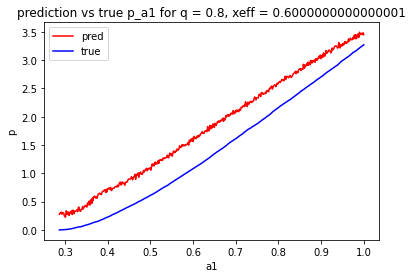

In [12]:
# evaluate model
test_q_xeff = np.stack((test_q, test_xeff), axis=1)
test_p_eval = model.evaluate([test_q_xeff, test_a1], test_p)
test_p_pred = model.predict([test_q_xeff, test_a1])
plt.plot(test_a1[3],test_p_pred[3],label = 'pred',color = 'red')
plt.plot(test_a1[3],test_p[3],label = 'true',color = 'blue')
plt.title(f'prediction vs true p_a1 for q = {test_q[3]}, xeff = {test_xeff[3]}')
plt.legend()
plt.xlabel('a1')
plt.ylabel('p')

Text(0, 0.5, 'loss')

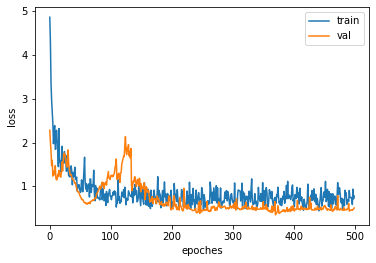

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'val'])
plt.xlabel('epoches')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

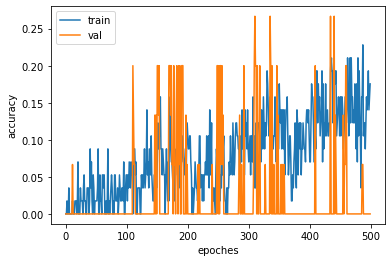

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'])
plt.xlabel('epoches')
plt.ylabel('accuracy')

In [15]:
# define model which take input of q, xeff, and a and output p
# input 2 numbers and 1 array, output 1 array with 500 elements
Input1 = keras.Input(shape=(2,)) # q, xeff
Input2 = keras.Input(shape=(500,)) # a1
merged = keras.layers.concatenate([Input1, Input2]) # Merging Laryer
# x = keras.layers.Dense(1024, activation='relu')(merged)
# x = keras.layers.Dropout(0.1)(x)
# x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(512, activation='relu')(merged) # Fully Connected Layer
x = keras.layers.Dropout(0.1)(x)
x = keras.layers.BatchNormalization()(x)
output = keras.layers.Dense(500, activation='relu')(x) # Fully Connected Layer

model = Model(inputs=[Input1,Input2], outputs=output)

In [16]:
opt = keras.optimizers.SGD(learning_rate = 1)
model.compile(optimizer= opt,
                loss='mse',
                metrics= ['accuracy'])

history = model.fit([train_q_xeff,train_a1], train_p, validation_split=0.2,
                    epochs=500, batch_size=8, shuffle=True, verbose=2)

Epoch 1/500
8/8 - 0s - loss: 3.6683 - accuracy: 0.0000e+00 - val_loss: 16.9834 - val_accuracy: 0.0000e+00 - 443ms/epoch - 55ms/step
Epoch 2/500
8/8 - 0s - loss: 2.0095 - accuracy: 0.0175 - val_loss: 52.9602 - val_accuracy: 0.3333 - 27ms/epoch - 3ms/step
Epoch 3/500
8/8 - 0s - loss: 1.6731 - accuracy: 0.0175 - val_loss: 48.8028 - val_accuracy: 0.0000e+00 - 29ms/epoch - 4ms/step
Epoch 4/500
8/8 - 0s - loss: 1.2864 - accuracy: 0.0000e+00 - val_loss: 38.4716 - val_accuracy: 0.0000e+00 - 28ms/epoch - 3ms/step
Epoch 5/500
8/8 - 0s - loss: 1.7438 - accuracy: 0.0351 - val_loss: 37.7605 - val_accuracy: 0.0000e+00 - 28ms/epoch - 3ms/step
Epoch 6/500
8/8 - 0s - loss: 1.6207 - accuracy: 0.0175 - val_loss: 78.0890 - val_accuracy: 0.0000e+00 - 28ms/epoch - 4ms/step
Epoch 7/500
8/8 - 0s - loss: 1.0306 - accuracy: 0.0175 - val_loss: 35.5715 - val_accuracy: 0.0000e+00 - 27ms/epoch - 3ms/step
Epoch 8/500
8/8 - 0s - loss: 0.9698 - accuracy: 0.0175 - val_loss: 29.9991 - val_accuracy: 0.0000e+00 - 28ms/epo

1/1 [==============================] - 0s 15ms/step - loss: 3.5490 - accuracy: 0.4444


Text(0, 0.5, 'p')

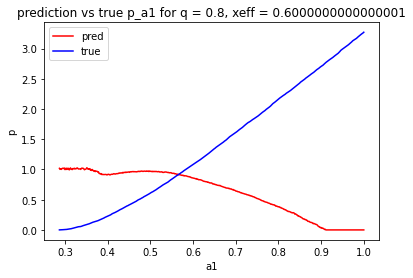

In [17]:
test_p_eval = model.evaluate([test_q_xeff, test_a1], test_p)
test_p_pred = model.predict([test_q_xeff, test_a1])
plt.plot(test_a1[3],test_p_pred[3],label = 'pred',color = 'red')
plt.plot(test_a1[3],test_p[3],label = 'true',color = 'blue')
plt.title(f'prediction vs true p_a1 for q = {test_q[3]}, xeff = {test_xeff[3]}')
plt.legend()
plt.xlabel('a1')
plt.ylabel('p')

In [18]:
# define model which take input of q, xeff, and a and output p
# input 2 numbers and 1 array, output 1 array with 500 elements
Input1 = keras.Input(shape=(2,)) # q, xeff
Input2 = keras.Input(shape=(500,)) # a1
merged = keras.layers.concatenate([Input1, Input2]) # Merging Laryer
# x = keras.layers.Dense(1024, activation='relu')(merged)
# x = keras.layers.Dropout(0.1)(x)
# x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(512, activation='relu')(merged) # Fully Connected Layer
x = keras.layers.Dropout(0.1)(x)
x = keras.layers.BatchNormalization()(x)
output = keras.layers.Dense(500, activation='relu')(x) # Fully Connected Layer

model = Model(inputs=[Input1,Input2], outputs=output)
opt = keras.optimizers.SGD(learning_rate = 1)
model.compile(optimizer= opt,
                loss='mse',
                metrics= ['accuracy'])

history = model.fit([train_q_xeff,train_a1], train_p, validation_split=0.2,
                    epochs=500, batch_size=25, shuffle=True, verbose=2)

Epoch 1/500
3/3 - 0s - loss: 4.6901 - accuracy: 0.0175 - val_loss: 5.6884 - val_accuracy: 0.0000e+00 - 436ms/epoch - 145ms/step
Epoch 2/500
3/3 - 0s - loss: 3.0784 - accuracy: 0.0175 - val_loss: 23.7436 - val_accuracy: 0.0000e+00 - 21ms/epoch - 7ms/step
Epoch 3/500
3/3 - 0s - loss: 2.3238 - accuracy: 0.0000e+00 - val_loss: 68.4651 - val_accuracy: 0.3333 - 21ms/epoch - 7ms/step
Epoch 4/500
3/3 - 0s - loss: 1.5219 - accuracy: 0.1053 - val_loss: 58.9670 - val_accuracy: 0.0000e+00 - 21ms/epoch - 7ms/step
Epoch 5/500
3/3 - 0s - loss: 1.3916 - accuracy: 0.0000e+00 - val_loss: 63.2181 - val_accuracy: 0.0000e+00 - 20ms/epoch - 7ms/step
Epoch 6/500
3/3 - 0s - loss: 1.1920 - accuracy: 0.0175 - val_loss: 48.7733 - val_accuracy: 0.2667 - 22ms/epoch - 7ms/step
Epoch 7/500
3/3 - 0s - loss: 1.3492 - accuracy: 0.0175 - val_loss: 47.5769 - val_accuracy: 0.3333 - 22ms/epoch - 7ms/step
Epoch 8/500
3/3 - 0s - loss: 1.1824 - accuracy: 0.0351 - val_loss: 47.5689 - val_accuracy: 0.3333 - 22ms/epoch - 7ms/ste

Text(0, 0.5, 'loss')

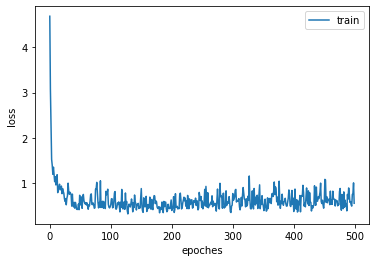

In [19]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.legend(['train', 'val'])
plt.xlabel('epoches')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

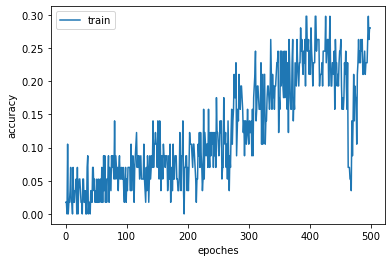

In [20]:
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'])
plt.xlabel('epoches')
plt.ylabel('accuracy')

In [21]:
test_q_xeff[3]

array([0.8, 0.6])

1/1 [==============================] - 0s 15ms/step - loss: 1.4984 - accuracy: 0.3333


Text(0, 0.5, 'p')

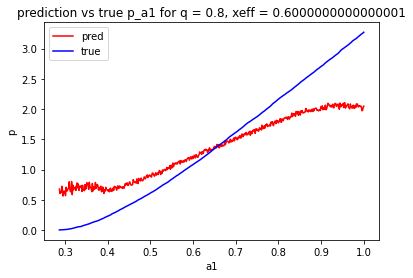

In [22]:
test_p_eval = model.evaluate([test_q_xeff, test_a1], test_p)
test_p_pred = model.predict([test_q_xeff, test_a1])
plt.plot(test_a1[3],test_p_pred[3],label = 'pred',color = 'red')
plt.plot(test_a1[3],test_p[3],label = 'true',color = 'blue')
plt.title(f'prediction vs true p_a1 for q = {test_q[3]}, xeff = {test_xeff[3]}')
plt.legend()
plt.xlabel('a1')
plt.ylabel('p')

Text(0, 0.5, 'p')

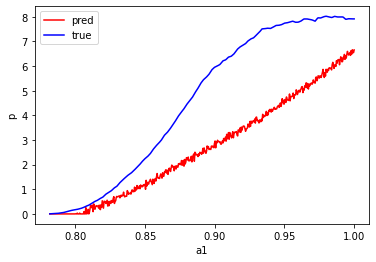

In [23]:
plt.plot(test_a1[4],test_p_pred[4],label = 'pred',color = 'red')
plt.plot(test_a1[4],test_p[4],label = 'true',color = 'blue')
plt.legend()
plt.legend()
plt.xlabel('a1')
plt.ylabel('p')

In [24]:
# define model which take input of q, xeff, and a and output p
# input 2 numbers and 1 array, output 1 array with 500 elements
Input1 = keras.Input(shape=(2,)) # q, xeff
Input2 = keras.Input(shape=(500,)) # a1
merged = keras.layers.concatenate([Input1, Input2]) # Merging Laryer
# x = keras.layers.Dense(1024, activation='relu')(merged)
# x = keras.layers.Dropout(0.1)(x)
# x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(512, activation='relu')(merged) # Fully Connected Layer
x = keras.layers.Dropout(0.1)(x)
x = keras.layers.BatchNormalization()(x)
output = keras.layers.Dense(500, activation='relu')(x) 

model = Model(inputs=[Input1,Input2], outputs=output)
opt = keras.optimizers.SGD(learning_rate = 1.5)
model.compile(optimizer= opt,
                loss='mse',
                metrics= ['accuracy'])

history = model.fit([train_q_xeff,train_a1], train_p, validation_split=0.2,
                    epochs=500, batch_size=25, shuffle=True, verbose=2)

Epoch 1/500
3/3 - 0s - loss: 4.5967 - accuracy: 0.0000e+00 - val_loss: 22.7759 - val_accuracy: 0.0000e+00 - 436ms/epoch - 145ms/step
Epoch 2/500
3/3 - 0s - loss: 2.4442 - accuracy: 0.0000e+00 - val_loss: 120.8960 - val_accuracy: 0.0000e+00 - 21ms/epoch - 7ms/step
Epoch 3/500
3/3 - 0s - loss: 1.5252 - accuracy: 0.0351 - val_loss: 105.3199 - val_accuracy: 0.0000e+00 - 22ms/epoch - 7ms/step
Epoch 4/500
3/3 - 0s - loss: 1.4559 - accuracy: 0.0351 - val_loss: 131.8823 - val_accuracy: 0.0000e+00 - 21ms/epoch - 7ms/step
Epoch 5/500
3/3 - 0s - loss: 1.4072 - accuracy: 0.0175 - val_loss: 140.4978 - val_accuracy: 0.0000e+00 - 21ms/epoch - 7ms/step
Epoch 6/500
3/3 - 0s - loss: 1.4701 - accuracy: 0.0000e+00 - val_loss: 85.4066 - val_accuracy: 0.0000e+00 - 21ms/epoch - 7ms/step
Epoch 7/500
3/3 - 0s - loss: 1.5005 - accuracy: 0.0000e+00 - val_loss: 61.5731 - val_accuracy: 0.0000e+00 - 21ms/epoch - 7ms/step
Epoch 8/500
3/3 - 0s - loss: 0.8294 - accuracy: 0.0175 - val_loss: 78.1818 - val_accuracy: 0.00

Text(0, 0.5, 'accuracy')

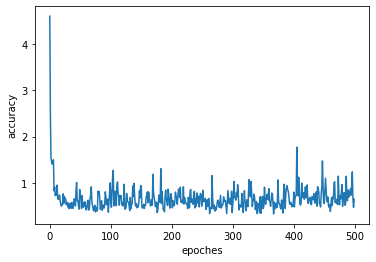

In [25]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_accuracy'])
#plt.legend(['train', 'val'])
plt.xlabel('epoches')
plt.ylabel('accuracy')

Text(0, 0.5, 'accuracy')

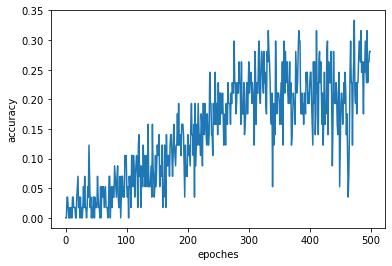

In [26]:
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
#plt.legend(['train', 'val'])
plt.xlabel('epoches')
plt.ylabel('accuracy')

1/1 [==============================] - 0s 16ms/step - loss: 1.7768 - accuracy: 0.2778


Text(0, 0.5, 'p')

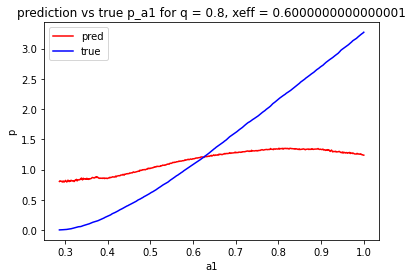

In [27]:
test_p_eval = model.evaluate([test_q_xeff, test_a1], test_p)
test_p_pred = model.predict([test_q_xeff, test_a1])
plt.plot(test_a1[3],test_p_pred[3],label = 'pred',color = 'red')
plt.plot(test_a1[3],test_p[3],label = 'true',color = 'blue')
plt.legend()
plt.title(f'prediction vs true p_a1 for q = {test_q[3]}, xeff = {test_xeff[3]}')
plt.xlabel('a1')
plt.ylabel('p')

Text(0, 0.5, 'p')

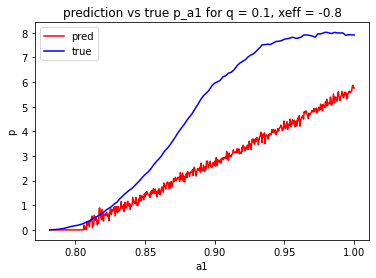

In [28]:
plt.plot(test_a1[4],test_p_pred[4],label = 'pred',color = 'red')
plt.plot(test_a1[4],test_p[4],label = 'true',color = 'blue')
plt.legend()
plt.title(f'prediction vs true p_a1 for q = {test_q[4]}, xeff = {test_xeff[4]}')
plt.xlabel('a1')
plt.ylabel('p')